# EDA: Enterprise-Driven Open-Source Software Projects 

This notebook analyzes [a dataset of 17,264 open source GitHub software projects](https://zenodo.org/record/3742962#.YYXasGLMKUk) that are developed primarily by enterprises, rather than a community of volunteers. This dataset can be used to address known generalizability concerns around OSS provenance, licensing, and properties; and, also, to perform research on open source business software development. 

As shown in these data, enterprise OSS projects are staffed by a plurality of enterprise employees, who appear to be pulling more than their weight. In a small percentage of relatively large enterprise open-source software projects, development happens *exclusively* through enterprise insiders.

The main dataset is provided as a 17,264 record tab-separated file named `enterprise_projects.txt` with the following 29 fields:

* `url`: the project's GitHub URL
* `project_id`: the project's GHTorrent identifier
* `sdtc`: true if selected using the same domain top committers heuristic (9,016 records)
* `mcpc`: true if selected using the multiple committers from a valid enterprise heuristic (8,314 records)
* `mcve`: true if selected using the multiple committers from a probable company heuristic (8,015 records),
* `star_number`: number of GitHub watchers
* `commit_count`: number of commits
* `files`: number of files in current main branch
* `lines`: corresponding number of lines in text files
* `pull_requests`: number of pull requests
* `github_repo_creation`: timestamp of the GitHub repository creation
* `earliest_commit`: timestamp of the earliest commit
* `most_recent_commit`: date of the most recent commit
* `committer_count`: number of different committers
* `author_count`: number of different authors
* `dominant_domain`: the projects dominant email domain
* `dominant_domain_committer_commits`: number of commits made by committers whose email matches the project's dominant domain
* `dominant_domain_author_commits`: corresponding number for commit authors
* `dominant_domain_committers`: number of committers whose email matches the project's dominant domain
* `dominant_domain_authors`: corresponding number for commit authors
* `cik`: SEC's EDGAR "central index key"
* `fg500`: true if this is a Fortune Global 500 company (2,233 records)
* `sec10k`: true if the company files SEC 10-K forms (4,180 records)
* `sec20f`: true if the company files SEC 20-F forms (429 records)
* `project_name`: GitHub project name
* `owner_login`: GitHub project's owner login
* `company_name`: company name as derived from the SEC and Fortune 500 data
* `owner_company`: GitHub project's owner company name
* `license`: SPDX license identifier

The file `cohost_project_details.txt` provides the full set of 311,223 cohort projects that are **not** part of the enterprise data set, but have comparable quality attributes.

* `url`: the project's GitHub URL
* `project_id`: the project's GHTorrent identifier
* `stars`: number of GitHub watchers
* `commit_count`: number of commits

# Importing the dataset

In [ ]:
import pandas as pd
import pyodide 
import os

In [ ]:
enterprise_projects = pyodide.open_url("https://raw.githubusercontent.com/dynamicwebpaige/nanowrimo-2021/main/data/enterprise_projects.txt")
cohort_projects = pyodide.open_url("https://raw.githubusercontent.com/dynamicwebpaige/nanowrimo-2021/main/data/cohort_project_details.txt")

In [ ]:
oss_projects = pd.read_csv(enterprise_projects, sep='\t', header=None)
# cohort_oss_projects = pd.read_csv(cohort_projects, sep=' ', header=None)

In [17]:
oss_projects

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,https://github.com/aligent/CacheObserver,149215,t,t,t,67,117,28.0,3776.0,20,...,6,NaN,NaN,NaN,NaN,CacheObserver,aligent,NaN,NaN,NaN
1,https://github.com/moguno/mikutter-windows,8303484,t,f,f,30,118,24.0,921.0,4,...,3,NaN,NaN,NaN,NaN,mikutter-windows,moguno,NaN,NaN,NaN
2,https://github.com/moguno/mikutter-subparts-image,7633353,t,f,f,30,206,7.0,551.0,9,...,3,NaN,NaN,NaN,NaN,mikutter-subparts-image,moguno,NaN,NaN,NaN
3,https://github.com/10up/theme-scaffold,94836776,f,t,t,79,341,76.0,19577.0,76,...,5,NaN,NaN,NaN,NaN,theme-scaffold,10up,NaN,NaN,MIT
4,https://github.com/10up/plugin-scaffold,95361839,f,t,t,48,152,48.0,16075.0,57,...,6,NaN,NaN,NaN,NaN,plugin-scaffold,10up,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,https://github.com/AppCanOpenSource/appcan-ios,14381676,t,f,f,73,864,838.0,90591.0,94,...,3,NaN,NaN,NaN,NaN,appcan-ios,AppCanOpenSource,NaN,zymobi,LGPL-3.0
17260,https://github.com/zynxhealth/z-mon,184224,f,t,f,35,99,29.0,3076.0,3,...,1,NaN,NaN,NaN,NaN,z-mon,zynxhealth,NaN,NaN,NaN
17261,https://github.com/zalando/riptide,20895628,f,f,t,111,1710,533.0,33740.0,247,...,7,NaN,NaN,NaN,NaN,riptide,zalando,NaN,NaN,MIT
17262,https://github.com/zalando-incubator/remora,62870276,f,f,t,147,141,NaN,NaN,41,...,0,NaN,NaN,NaN,NaN,remora,Zalando-Incubator,NaN,NaN,MIT


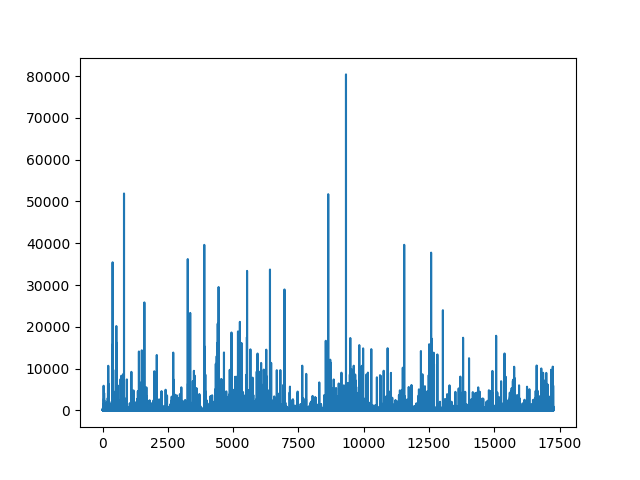

In [ ]:
import matplotlib.pyplot as plt

plt.plot(oss_projects[5])
plt.show()

In [19]:
oss_projects[25].value_counts().sort_values(ascending=False)

Microsoft        855
Azure            328
google           123
twitter           93
18F               90
                ... 
Live2D             1
servo              1
sethm              1
terminal-labs      1
bleroy             1
Name: 25, Length: 5097, dtype: int64

In [ ]:
# Remember to file issue: max_rows and max_columns isn't respected.
pd.set_option("display.max_rows", 100)